In [ ]:
# %pip install opencv-python-headless numpy scikit-learn tensorflow

In [ ]:
# Restart the runtime
# !kill -9 -1

In [1]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import os
import shutil
import cv2
import numpy as np
from sklearn.model_selection import (
    train_test_split,
)  # For proper train/validation split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.preprocessing.image import (
    ImageDataGenerator,
)  # For data augmentation
import matplotlib.pyplot as plt

In [3]:
# 1. Dataset Path and Organization:

dataset_path = "/content/drive/MyDrive/Projects/Plant Disease Prediction/Groundnut_Leaf_dataset"  # Your dataset path
train_dir = os.path.join(dataset_path, "train")
test_dir = os.path.join(dataset_path, "test")

# Get the class names (disease names)
class_names = os.listdir(train_dir)
num_classes = len(class_names)
print(f"Number of classes: {num_classes}")
print(f"Class names: {class_names}")

Number of classes: 6
Class names: ['healthy_leaf_1', 'early_leaf_spot_1', 'rust_1', 'early_rust_1', 'nutrition_deficiency_1', 'late_leaf_spot_1']


In [4]:
# 2. Data Loading and Preprocessing:

images = []
labels = []

for split_dir in [train_dir, test_dir]:  # Loop through train and test
    for class_name in class_names:
        class_dir = os.path.join(split_dir, class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith((".jpg", ".png", ".jpeg")):
                img_path = os.path.join(class_dir, filename)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, (224, 224))  # Resize
                    images.append(img)
                    labels.append(class_name)
                else:
                    print(f"Error reading image: {img_path}")

images = np.array(images)
labels = np.array(labels)

In [5]:
# Label Encoding:
le = LabelEncoder()
labels_encoded = le.fit_transform(labels)
print(labels_encoded)

[2 2 2 ... 3 3 3]


In [ ]:
# # Split the training data into train and validation sets:
# X_train, X_val, y_train, y_val = train_test_split(
#     images[:len(os.listdir(train_dir)*5)], labels_encoded[:len(os.listdir(train_dir)*5)], train_size=0.8, random_state=42, stratify=labels_encoded[:len(os.listdir(train_dir)*5)] # 80% train, 20% validation
# )

# X_test = images[len(os.listdir(train_dir)*5):]
# y_test = labels_encoded[len(os.listdir(train_dir)*5):]

# print("Train data shape:", X_train.shape)
# print("Validation data shape:", X_val.shape)
# print("Test data shape:", X_test.shape)

Train data shape: (24, 224, 224, 3)
Validation data shape: (6, 224, 224, 3)
Test data shape: (10351, 224, 224, 3)


In [6]:
from sklearn.model_selection import train_test_split

# Load your dataset
# Assuming `images` is a numpy array of shape (number_of_images, 224, 224, 3)
# and `labels_encoded` is the corresponding labels

# Calculate the number of samples to use for training and testing
num_samples = len(images)
train_size = int(0.8 * num_samples)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    images, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded
)

# Further split the test set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_test, y_test, test_size=0.5, random_state=42, stratify=y_test
)

print("Train data shape:", X_train.shape)
print("Validation data shape:", X_val.shape)
print("Test data shape:", X_test.shape)

Train data shape: (8304, 224, 224, 3)
Validation data shape: (1038, 224, 224, 3)
Test data shape: (1039, 224, 224, 3)


In [ ]:
# # 3. Data Augmentation (Important for small datasets):
# datagen = ImageDataGenerator(
#     rotation_range=20,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# datagen.fit(X_train)  # Fit the datagen on the training data

In [7]:
# 4. CNN Model Building:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Conv2D(
            32, (3, 3), activation="relu", input_shape=(224, 224, 3)
        ),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(
            64, (3, 3), activation="relu"
        ),  # Added another Conv layer
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),  # Increased Dense layer units
        tf.keras.layers.Dropout(0.5),  # Added dropout for regularization
        tf.keras.layers.Dense(
            num_classes, activation="softmax"
        ),  # Output layer with softmax
    ]
)

model.compile(
    optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"]
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# 5. Model Training with Data Augmentation:
epochs = 10  # Adjust as needed
batch_size = 32  # Adjust as needed

# history = model.fit(
#     datagen.flow(X_train, y_train, batch_size=batch_size),  # Use datagen.flow
#     epochs=epochs,
#     validation_data=(X_val, y_val),  # Use validation data
#     steps_per_epoch=len(X_train) // batch_size  # Calculate steps per epoch
# )

# Model Training without Data Augmentation
history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_data=(X_val, y_val),  # Directly using validation data
)

Epoch 1/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 22s 58ms/step - accuracy: 0.2550 - loss: 235.4765 - val_accuracy: 0.3372 - val_loss: 1.6233
Epoch 2/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.3911 - loss: 1.5043 - val_accuracy: 0.4181 - val_loss: 1.5232
Epoch 3/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.5483 - loss: 1.1967 - val_accuracy: 0.4499 - val_loss: 1.5037
Epoch 4/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.6423 - loss: 1.0530 - val_accuracy: 0.4913 - val_loss: 1.4527
Epoch 5/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - accuracy: 0.7676 - loss: 0.6881 - val_accuracy: 0.5145 - val_loss: 1.4845
Epoch 6/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.8422 - loss: 0.4916 - val_accuracy: 0.4721 - val_loss: 1.5192
Epoch 7/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - accuracy: 0.8680 - loss: 0.4179 - val_accuracy: 0.5241 - val_loss: 1.7363
Epoch 8/20
260/260 ━━━━━━━━━━━━━━━━━━━━ 10s 39ms/step - accuracy: 0.9025 - loss: 0.3042 

In [9]:
# 6. Model Evaluation:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

Test Loss: 2.7070229053497314
Test Accuracy: 0.5283926725387573


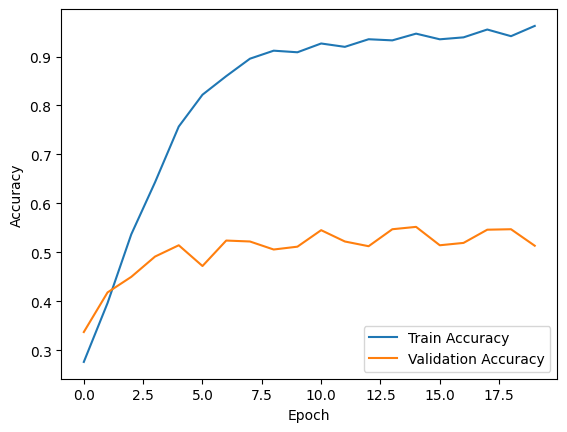

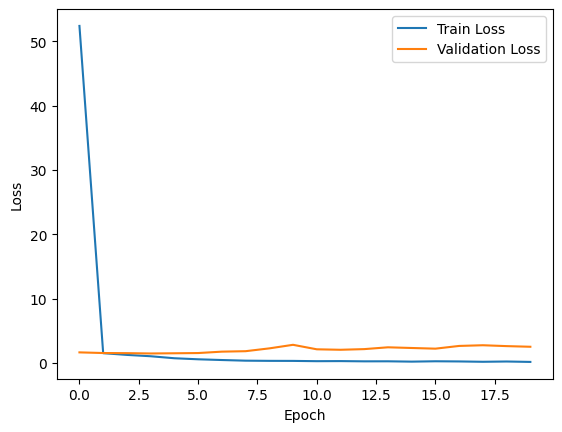

In [17]:
# 8. Plotting Training History

plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# from tensorflow.keras.models import load_model

# # Load the saved model from Google Drive
# model = load_model('/content/drive/My Drive/plant_disease_model.h5')

# # Verify the model structure
# model.summary()